In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('admission.csv')

In [3]:
df.shape

(400, 4)

In [4]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
### Check missing values
df.isnull().sum()

ADMIT    0
GRE      0
GPA      0
RANK     0
dtype: int64

In [6]:
### checking the duplicates
df.duplicated().sum()

np.int64(5)

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.duplicated().sum()

np.int64(0)

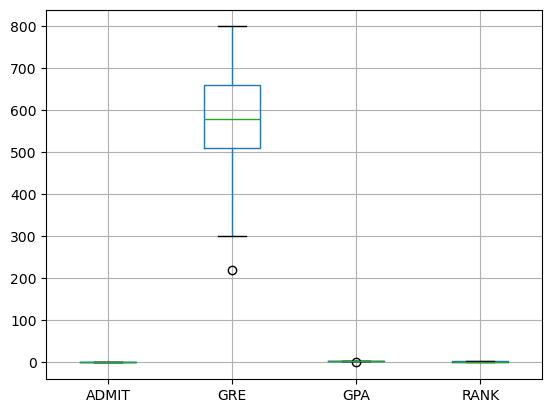

In [9]:
df.boxplot()
plt.show()

In [10]:

### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

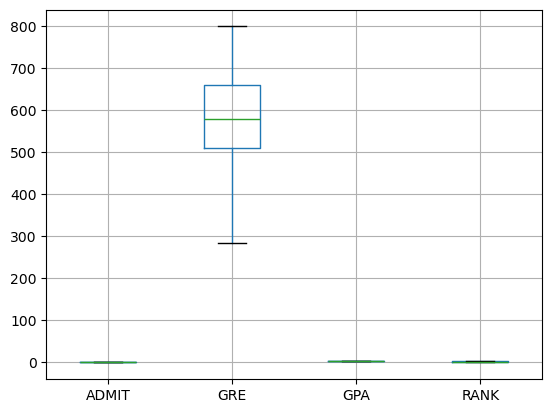

In [11]:
df.boxplot()
plt.show()

In [12]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380.0,3.61,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.93,4


In [13]:
target=df[['ADMIT']]
features= df.drop(columns=['ADMIT'])

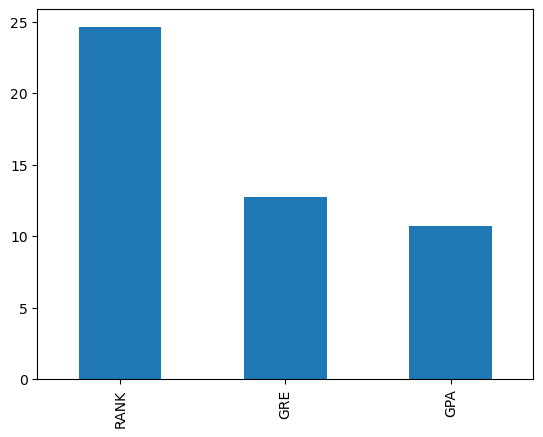

In [14]:
from sklearn.feature_selection import f_classif
f_clas= f_classif(features,target)
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [15]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 3)
(99, 3)
(296, 1)
(99, 1)


In [16]:
std_sca=StandardScaler()
x_train[['GRE','GPA']]= std_sca.fit_transform(x_train[['GRE','GPA']])

In [17]:
x_test[['GRE','GPA']]= std_sca.transform(x_test[['GRE','GPA']])

In [18]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [19]:
log_model.coef_

array([[ 0.27902416,  0.23973572, -0.54233654]])

In [20]:
log_model.intercept_

array([0.46707475])

In [21]:
y_pred= log_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [22]:
accuracy_score(y_test,y_pred)

0.6868686868686869

In [35]:
### Thershold changing
y_pred1= [1 if x[1]>=0.45 else 0 for x in log_model.predict_proba(x_test)]

In [36]:
print(y_pred1)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [37]:
accuracy_score(y_test,y_pred1)

0.696969696969697

In [41]:
### cost function
log_loss(y_test,sigmoid)

0.5818058144999894

In [40]:
### sigmoid values
sigmoid= log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.31302824, 0.5509485 , 0.30771446, 0.54619833, 0.26865835,
       0.22119005, 0.62706373, 0.16608706, 0.20118506, 0.20973116,
       0.21877532, 0.18340334, 0.22939249, 0.24078416, 0.12189239,
       0.05812285, 0.36023977, 0.43206546, 0.21685855, 0.5582815 ,
       0.10174746, 0.26586925, 0.15731433, 0.14483897, 0.35798432,
       0.16176249, 0.19202491, 0.14516785, 0.42548572, 0.09404837,
       0.15199525, 0.4335925 , 0.15589403, 0.2495587 , 0.29765436,
       0.31781615, 0.24574394, 0.13943212, 0.30602749, 0.25548271,
       0.19373768, 0.42515045, 0.33622519, 0.5478042 , 0.41978175,
       0.47856144, 0.58029794, 0.28825535, 0.20326147, 0.38904174,
       0.56418245, 0.35870852, 0.39885576, 0.15711168, 0.20402219,
       0.32503468, 0.27385256, 0.52900447, 0.26366151, 0.35912035,
       0.44335615, 0.16047153, 0.15693011, 0.22445509, 0.33687301,
       0.14813408, 0.38378447, 0.24871292, 0.38819129, 0.12687984,
       0.43208482, 0.24165936, 0.18243475, 0.34088344, 0.25072

#### Performance Metrics

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

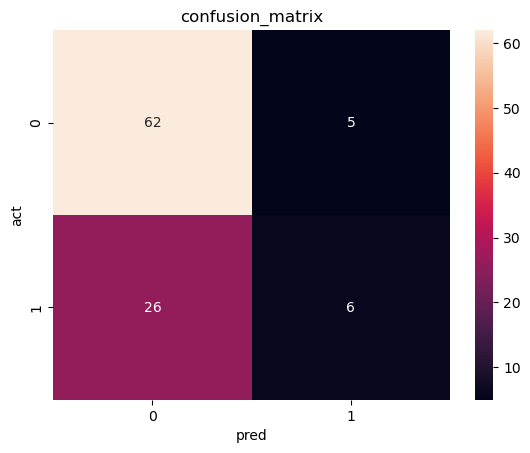

In [48]:
conf= confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix')
plt.show();

In [51]:
y_test.value_counts()

ADMIT
0        67
1        32
Name: count, dtype: int64

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        67
           1       0.55      0.19      0.28        32

    accuracy                           0.69        99
   macro avg       0.62      0.56      0.54        99
weighted avg       0.65      0.69      0.63        99



##### ROC Curve

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.6870335820895522)

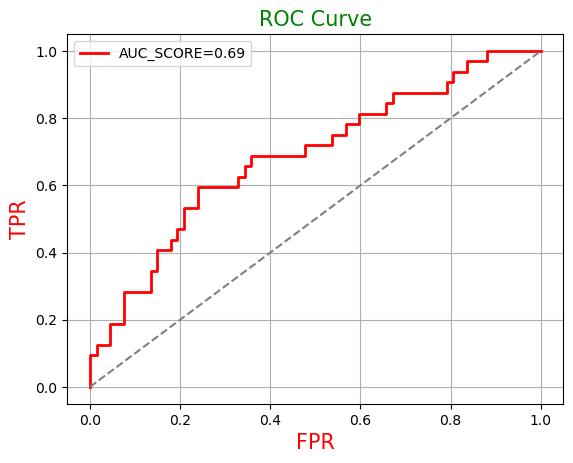

In [77]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,color='red',linewidth=2,label=f'AUC_SCORE={auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=15,color='red')
plt.title('ROC Curve',color='green',size=15)
plt.legend()
plt.grid()
plt.show()